<a href="https://colab.research.google.com/github/Hasham97/Assessment-for-C7081-2023/blob/main/My_Assessment_C7081.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistical Analysis for the Quality of White Wine**


# **1. Introduction**
Once viewed as a luxury good, nowadays wine is increasingly
enjoyed by a wider range of consumers. In 2021, Portugal exported $1.1B in wine, making it the 9th largest exporter of wine in the world. Exports of Vinho Verde wine have been steadily rising over the years with 43% of wine made in the region in 2015 going overseas (compared to 15% in 2003). Production of wine remained quite stable until 2018 and dropped drastically for the years 2019, 2020 and 2021 but it was back on track for the years 2022 and 2023.

This report focuses on a dataset of white wine quality and the factors responsible for it's quality.

# **2. Background**
This study will consider vinho verde, a unique product from the
Minho (northwest) region of Portugal. Medium in alcohol, is it
particularly appreciated due to its freshness in the summer. This wine accounts for 15% of the total Portuguese production, and around 10% is exported. In this work, we will analyze one of the most common variants i.e. white wine, from the demarcated region of vinho verde.

In this report, we will look at different factors responsible for quality of white wine, analyze them and find relations between them using regression and correlation. By going through the main article, I came to know that the data classes are ordered properly but not balanced (e.g. there are many more normal wines than excellent or poor ones). Hence, main objectives of this report are:

*   To fit a multiple regression model to examine how the combination of features (independent variables) collectively relates to wine quality (dependent variable). This analysis can help identify which features have a significant impact on wine quality and how they interact with each other.

*   To compare the number of normal wines and outliers (excellent and poor wines).

*   To remove the outliers.

# **3. Methods and Results**
The dataset is a wine quality dataset that is publicly available for
research purpose and it contains 4899 instances with 11 features for white wine. The inputs include objective tests (e.g. pH values) and the output is
based on sensory data (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent). The final sensory score was given by the median of these evaluations.

The dataset is related to the white variant of the Portuguese “Vinho Verde” wine. The features include fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol. pH describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic). Most wines are between 3-4 on the pH scale. Chloride is the amount of salt in the wine. Alcohol is the percent alcohol content of the wine. The dataset also shows how each factor/variable contributes to the quality.

We will use a statistical technique called as ordinary least squares (OLS) to find out how each factor has an effect on the quality. Moreover, we will use Z-score method to take a look at the outliers and remove them.

**Ordinary Least Square Method**

We use this method because it is easy to understand and implement, with a closed-form solution that can be computed analytically or numerically. Following are the steps for carrying out an OLS method.

In [ ]:
# Clone the GitHub repository
!git clone https://github.com/Hasham97/Assessment-for-C7081-2023.git

Cloning into 'Assessment-for-C7081-2023'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 30 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (30/30), 780.66 KiB | 14.46 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

We need pandas for data manipulation, numpy for mathematical calculations, and matplotLib, and seaborn for graphical visualizations. Sklearn libraries here are used for simple linear regression.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [ ]:
# Get dataset
df = pd.read_excel('/content/Assessment-for-C7081-2023/white wine.xlsx')
df.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# Describe data
df.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
# Import statsmodels API for carrying out the statistical test
import statsmodels.api as sm

# Load the wine quality dataset
wine_data = pd.read_excel('/content/Assessment-for-C7081-2023/white wine.xlsx')

# Define the independent variables and the dependent variable
X = wine_data[['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide','Total Sulfur Dioxide','Density','pH','Sulphates','Alcohol',]]
y = wine_data['Quality']

# Add a constant column to the independent variables to account for the intercept term
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:38:35   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928 

In this case, R-squared is 0.282, showing that the model explains about 28.2% of the variability in wine quality. This is a version of R-squared that adjusts for the number of predictors in the model. It is a bit lower than R-squared when there are multiple predictors i.e. it's 0.280. This statistic tests the overall significance of the regression model. The F-statistic is 174.3, and the associated p-value is very close to zero, suggesting that the model is statistically significant. All in all, the model implies that features such as Volatile Acidity, Chlorides, Total Sulfur Dioxide, and Density have a significant impact on quality of white wine.

**Outlier Detection and Removal:**

For outlier detection and removal, we will use Z-score method. We are using this method because Z-scores can quantify the unusualness of an observation when data follows the normal distribution. Z-scores are the number of standard deviations above and below the mean that each value falls in. This method can be useful when comparing values from different normal distributions, as it shows each value in the form of its distance from the mean in units of standard deviation. It is very useful in identifying minimal and maximal extreme values in a dataset.

Following are the simple steps involved in detection, and removal, of outliers.

**Z-score test**

In [ ]:
# Describe data
df.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


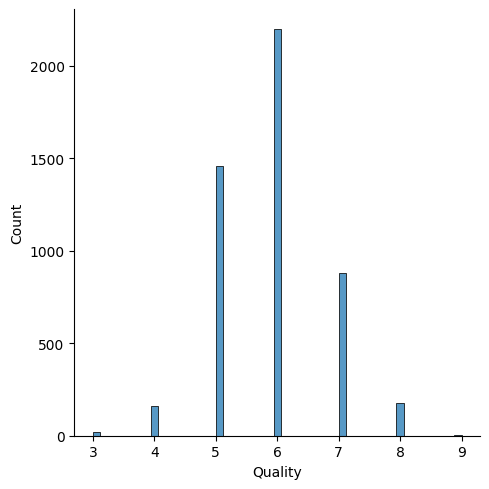

In [23]:
# Plot the data in distribution
sns.displot(df['Quality'])

<Axes: >

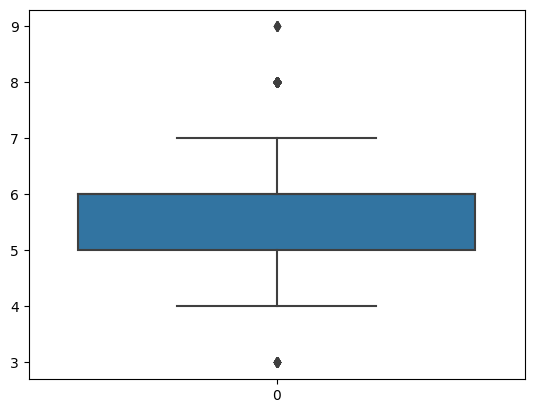

In [ ]:
# To view the outliers clearly
sns.boxplot(df['Quality'])

In [ ]:
# Let's find the limits
upper_limit = df['Quality'].mean() + 3*df['Quality'].std()
lower_limit = df['Quality'].mean() - 3*df['Quality'].std()
print('upper_limit', upper_limit)
print('lower_limit', lower_limit)

upper_limit 8.534825075658905
lower_limit 3.220993625851917


In [ ]:
# For finding the outliers
df.loc[(df['Quality'] > upper_limit) | (df['Quality'] < lower_limit)]



,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
251,8.5,0.260,0.21,16.20,0.074,41.0,197.0,0.99800,3.02,0.50,9.8,3
253,5.8,0.240,0.44,3.50,0.029,5.0,109.0,0.99130,3.53,0.43,11.7,3
294,9.1,0.590,0.38,1.60,0.066,34.0,182.0,0.99680,3.23,0.38,8.5,3
445,7.1,0.320,0.32,11.00,0.038,16.0,66.0,0.99370,3.24,0.40,11.5,3
740,6.9,0.390,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3
774,9.1,0.270,0.45,10.60,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
820,6.6,0.360,0.29,1.60,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
827,7.4,0.240,0.36,2.00,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
873,10.3,0.170,0.47,1.40,0.037,5.0,33.0,0.99390,2.89,0.28,9.6,3
876,6.9,0.360,0.34,4.20,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9


In [ ]:
# Removal of Outliers (also known as Trimming)
new_df = df.loc[(df['Quality'] < upper_limit) & (df['Quality'] > lower_limit)]
old_df = df.loc[(df['Quality'] > upper_limit) | (df['Quality'] < lower_limit)]
print('old data:',len(df))
print('new data:',len(new_df))

old data: 4898
new data: 4873


The len() function is used to find the length of the data. If we remove the outliers (25), we will get 4873 normal white wines.

# **4. Conclusions**
We used Ordinary Least Square Method to find out the impact of each factor on the quality of white wine. The results suggest that the features such as Volatile Acidity, Chlorides, Total Sulfur Dioxide, and Density have a significant impact on quality of white wine. For outlier detection and removal, we used Z-score method which showed that number of poor wines (20) is higher than that of the excellent wines (5). Although we were able to find the most impactful factors for quality, the outliers were less likely to impact the data.

# **5. Literature cited**

*   Jover, A. J. V., Montes, F. J. L., Fuentez, M. M. F. (2004) 'Measuring perceptions of quality in food products: the case of red wine', Food Quality and Preference, 15, pp. 453–469. doi:10.1016/j.foodqual.2003.08.002.

*   Er, Y. & Atasoy, A. (2016) 'The Classification of White Wine and Red Wine According to Their Physicochemical Qualities', International Journal of Intelligent Systems and Applications in Engineering, 4, pp. 23–26. doi: 10.18201/ijisae.265954

*   Paulo, P. et al. (2009) 'Modeling wine preferences by data mining from physicochemical properties', Decision Support Systems, 47, pp.  547–533. doi:10.1016/j.dss.2009.05.016.


